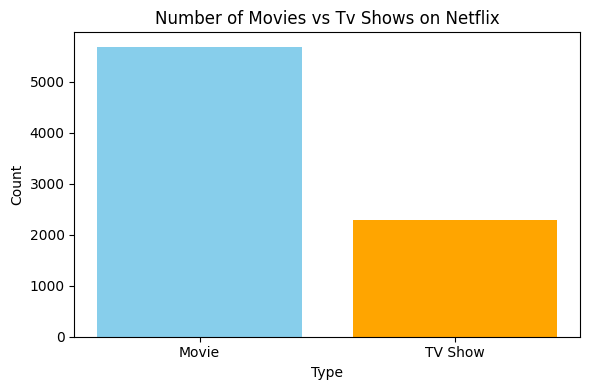

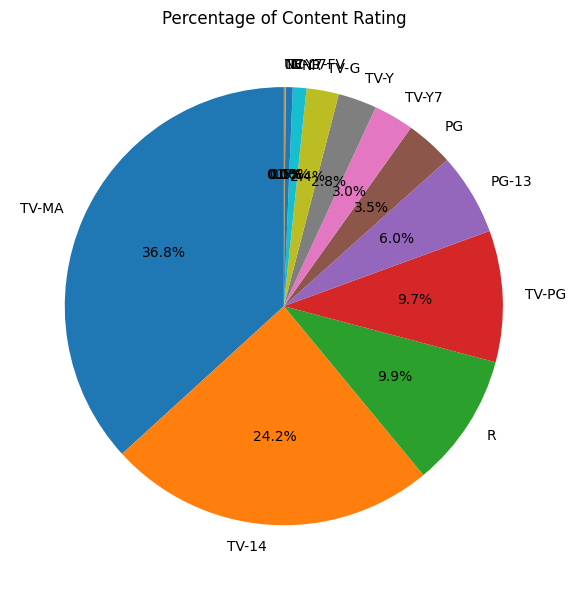

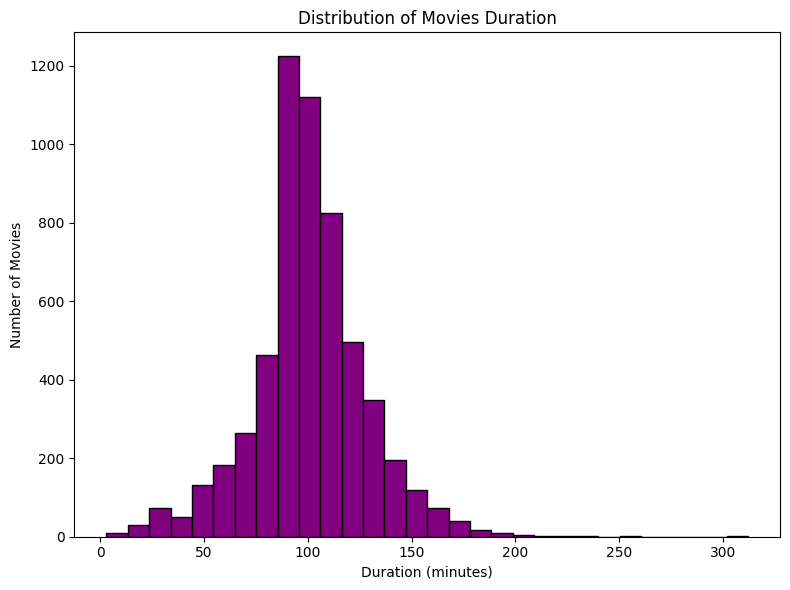

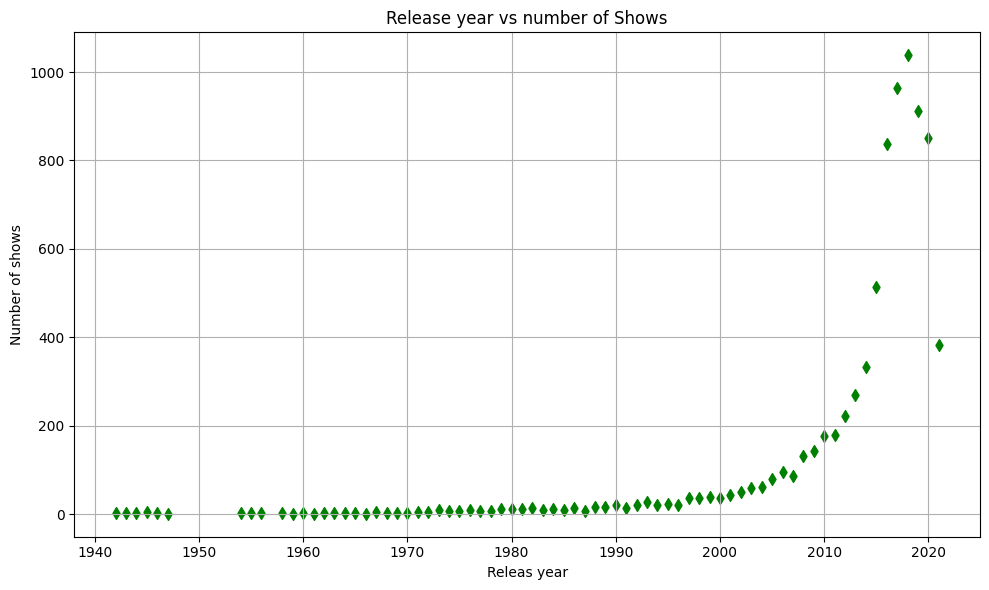

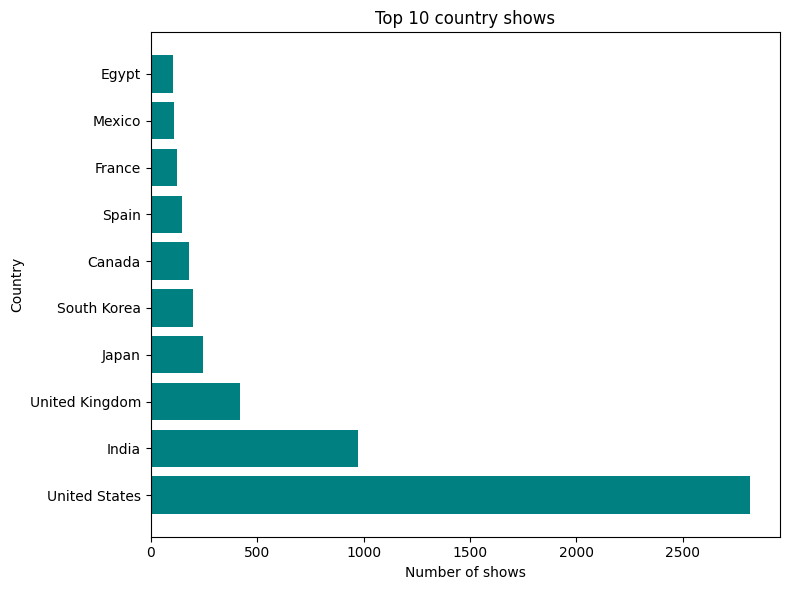

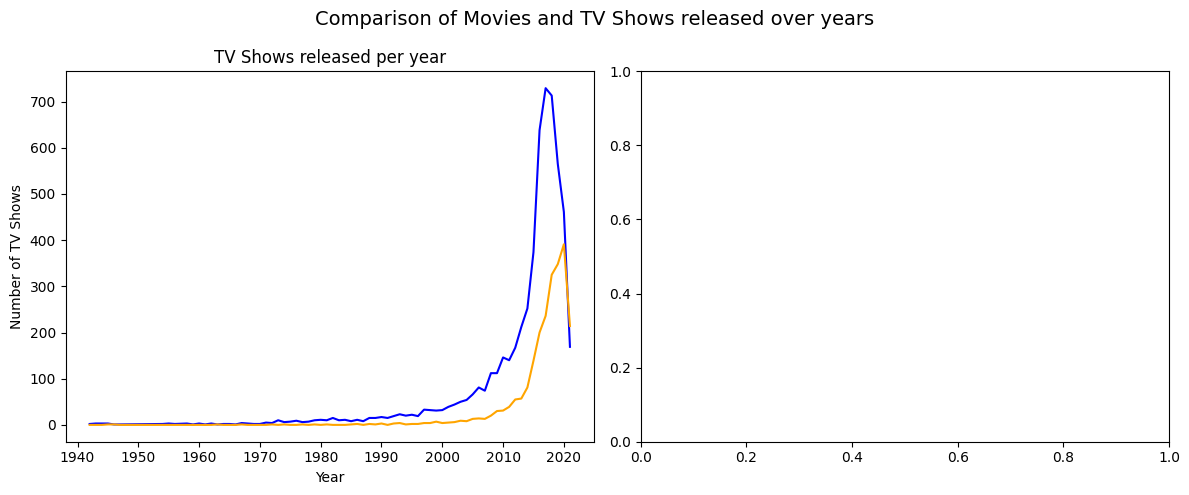

In [ ]:

# project : Netflix _ Visulazation
# 1 - import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv(r"C:\Users\nikhi\Desktop\Matplotlib\Project\netflix_titles.csv")

#  clean data

df = df.dropna(subset=['type','release_year','rating','country','duration'])


type_count = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=['skyblue' ,'orange'])
plt.title("Number of Movies vs Tv Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()


rating_count = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_count , labels=rating_count.index, autopct='%1.1f%%' , startangle=90)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig("ContenT_rating.png")
plt.show()


movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Movies Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("Movies_duration_histogram.png")
plt.show()


release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index , release_count.values , color = "green" , marker='d')
plt.title("Release year vs number of Shows")
plt.xlabel("Releas year")
plt.ylabel("Number of shows")
plt.tight_layout()
plt.grid()
plt.savefig("Release_scatter.png")
plt.show()


country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index , country_count.values , color = 'teal')
plt.title("Top 10 country shows")
plt.xlabel("Number of shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("Top_10_countries.png")
plt.show()


content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title("Movies released per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of movies")

# Second subplot: TV Shows
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[0].set_title("TV Shows released per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of TV Shows")

fig.suptitle('Comparison of Movies and TV Shows released over years', fontsize=14)
plt.tight_layout()
plt.savefig("Movies_tv_shows_comparison.png")
plt.show()
